In [29]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


In [2]:
Census_df=pd.read_csv("Copy of ACS_17_5YR_S1901_with_ann CENSUS 2017 5 yr span.csv")

In [3]:
Census_df.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC02_EST_VC20,HC02_MOE_VC20,HC03_EST_VC20,HC03_MOE_VC20,HC04_EST_VC20,HC04_MOE_VC20,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134
0,Id,Id2,Geography,Households; Estimate; Total,Households; Margin of Error; Total,Families; Estimate; Total,Families; Margin of Error; Total,Married-couple families; Estimate; Total,Married-couple families; Margin of Error; Total,Nonfamily households; Estimate; Total,...,Families; Estimate; PERCENT ALLOCATED - Nonfam...,Families; Margin of Error; PERCENT ALLOCATED -...,Married-couple families; Estimate; PERCENT ALL...,Married-couple families; Margin of Error; PERC...,Nonfamily households; Estimate; PERCENT ALLOCA...,Nonfamily households; Margin of Error; PERCENT...,NaN,NaN,NaN,NaN
1,0400000US06,6,California,12888128,18518,8862523,24004,6381333,31986,4025605,...,(X),(X),(X),(X),30.4,(X),NaN,NaN,NaN,NaN
2,1600000US0667000,667000,"San Francisco city, California",358772,1742,168738,1926,126761,1908,190034,...,(X),(X),(X),(X),28.8,(X),NaN,NaN,NaN,NaN
3,8600000US89010,89010,ZCTA5 89010,208,54,122,33,109,31,86,...,(X),(X),(X),(X),43,(X),NaN,NaN,NaN,NaN
4,8600000US89019,89019,ZCTA5 89019,788,203,354,143,211,105,434,...,(X),(X),(X),(X),28.8,(X),NaN,NaN,NaN,NaN


In [4]:
Census_df[Census_df['GEO.id2'].isin(["94110", "94115", "94109", "94107", "94112", "94117", "94111",
                     "94114", "94124", "94133", "94132", "94122", "94131", "94121",
                     "94118", "94108", "94103", "94116", "94105", "94127", "94102"])]

Filtered_df=Census_df[Census_df['GEO.id2'].isin(["94110", "94115", "94109", "94107", "94112", "94117", "94111",
                     "94114", "94124", "94133", "94132", "94122", "94131", "94121",
                     "94118", "94108", "94103", "94116", "94105", "94127", "94102"])]



#columns_df=pd.DataFrame(census.df, columns = ["GEO.id2", "HC01_EST_VC13","HC01_EST_VC15"]

In [5]:
isolated = Filtered_df.loc[:,["GEO.id2","HC01_EST_VC13","HC01_EST_VC15"]]

print(isolated)

isolated.dtypes

     GEO.id2 HC01_EST_VC13 HC01_EST_VC15
975    94102         33552         71287
976    94103         49052        102297
978    94105        199364        269416
979    94107        143467        181099
980    94108         55341         91859
981    94109         79979        124727
982    94110        109747        150063
983    94111         99464        144677
984    94112         82692        106249
985    94114        143902        200105
986    94115        103625        150888
987    94116        101746        142434
988    94117        132979        176172
989    94118        102021        148871
990    94121         87001        122610
991    94122        102838        133357
993    94124         55823         80499
994    94127        151094        198229
998    94131        119924        161645
999    94132         72970         97811
1000   94133         66422        117135


GEO.id2          object
HC01_EST_VC13    object
HC01_EST_VC15    object
dtype: object

In [6]:
isolated = isolated.apply(pd.to_numeric, errors='coerce')

#isolated['GEO.id2'] = isolated.GEO.id2.astype(float)

#isolated = np.array(isolated, dtype=np.float32)

#isolated['GEO.id2'].astype(str).astype(int)
# Passed a dictionary to astype() function  
#isolated = isolated.astype({"GEO.id2":'int64', "HC01_EST_VC13":'int64', "HC01_EST_VC15": 'int64'}) 
  
# Now print the data type  
# of all columns after change 
#isolated.info() 

#isolated.astype('int32').dtypes


In [7]:
isolated.dtypes

GEO.id2          int64
HC01_EST_VC13    int64
HC01_EST_VC15    int64
dtype: object

In [8]:
max_median= isolated.sort_values("HC01_EST_VC13", ascending=False)
print(max_median)



      GEO.id2  HC01_EST_VC13  HC01_EST_VC15
978     94105         199364         269416
994     94127         151094         198229
985     94114         143902         200105
979     94107         143467         181099
988     94117         132979         176172
998     94131         119924         161645
982     94110         109747         150063
986     94115         103625         150888
991     94122         102838         133357
989     94118         102021         148871
987     94116         101746         142434
983     94111          99464         144677
990     94121          87001         122610
984     94112          82692         106249
981     94109          79979         124727
999     94132          72970          97811
1000    94133          66422         117135
993     94124          55823          80499
980     94108          55341          91859
976     94103          49052         102297
975     94102          33552          71287


In [9]:
# Do this one!!

In [10]:
max_mean= isolated.sort_values("HC01_EST_VC15", ascending=False)
print(max_mean)

      GEO.id2  HC01_EST_VC13  HC01_EST_VC15
978     94105         199364         269416
985     94114         143902         200105
994     94127         151094         198229
979     94107         143467         181099
988     94117         132979         176172
998     94131         119924         161645
986     94115         103625         150888
982     94110         109747         150063
989     94118         102021         148871
983     94111          99464         144677
987     94116         101746         142434
991     94122         102838         133357
981     94109          79979         124727
990     94121          87001         122610
1000    94133          66422         117135
984     94112          82692         106249
976     94103          49052         102297
999     94132          72970          97811
980     94108          55341          91859
993     94124          55823          80499
975     94102          33552          71287


In [11]:
min_median= isolated.sort_values("HC01_EST_VC13", ascending=True)
print(min_median)

      GEO.id2  HC01_EST_VC13  HC01_EST_VC15
975     94102          33552          71287
976     94103          49052         102297
980     94108          55341          91859
993     94124          55823          80499
1000    94133          66422         117135
999     94132          72970          97811
981     94109          79979         124727
984     94112          82692         106249
990     94121          87001         122610
983     94111          99464         144677
987     94116         101746         142434
989     94118         102021         148871
991     94122         102838         133357
986     94115         103625         150888
982     94110         109747         150063
998     94131         119924         161645
988     94117         132979         176172
979     94107         143467         181099
985     94114         143902         200105
994     94127         151094         198229
978     94105         199364         269416


In [12]:
min_mean= isolated.sort_values("HC01_EST_VC15", ascending=True)
print(min_mean)

      GEO.id2  HC01_EST_VC13  HC01_EST_VC15
975     94102          33552          71287
993     94124          55823          80499
980     94108          55341          91859
999     94132          72970          97811
976     94103          49052         102297
984     94112          82692         106249
1000    94133          66422         117135
990     94121          87001         122610
981     94109          79979         124727
991     94122         102838         133357
987     94116         101746         142434
983     94111          99464         144677
989     94118         102021         148871
982     94110         109747         150063
986     94115         103625         150888
998     94131         119924         161645
988     94117         132979         176172
979     94107         143467         181099
994     94127         151094         198229
985     94114         143902         200105
978     94105         199364         269416


In [13]:
# sort by zip code

zip_c= isolated.sort_values("GEO.id2", ascending=True)
print(zip_c)

      GEO.id2  HC01_EST_VC13  HC01_EST_VC15
975     94102          33552          71287
976     94103          49052         102297
978     94105         199364         269416
979     94107         143467         181099
980     94108          55341          91859
981     94109          79979         124727
982     94110         109747         150063
983     94111          99464         144677
984     94112          82692         106249
985     94114         143902         200105
986     94115         103625         150888
987     94116         101746         142434
988     94117         132979         176172
989     94118         102021         148871
990     94121          87001         122610
991     94122         102838         133357
993     94124          55823          80499
994     94127         151094         198229
998     94131         119924         161645
999     94132          72970          97811
1000    94133          66422         117135


In [14]:
# # start to make a 3d bar plot

# fig = plt.figure()
# ax1 = fig.add_sublot(111, projection='3d')

# xpos=[94102, 94103, 94105, 94107, 94108, 94109, 94110, 94111, 94112, 94114, 94115, 94116, 94117, 94118, 94121, 94122,
#       94124, 94127, 94131, 94132, 94133]
# ypos=[1,4,7,10,13,16,2,5,8,11,14,17,20,3,6,9,12,15,18,21]
# zpos=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# dx= np.ones(1000)
# dy= np.ones(1000)
# dz = [33552, 49052, 199364, 143467, 55341,79979, 109747, 99464, 82692, 143902, 103625, 101746, 132979, 102021,
#      87001, 102838, 55823, 151094, 119924, 72970, 66422]

# ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='plum')

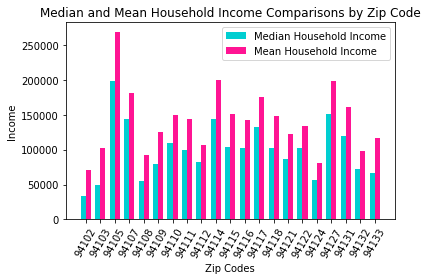

In [15]:
#Make a bar chart to show median and mean household income for each zip code
labels = ['94102', '94103', '94105', '94107', '94108', '94109', '94110', '94111', '94112', '94114', '94115', '94116', '94117', '94118', '94121', '94122',
           '94124', '94127', '94131', '94132', '94133']
median_income = [33552, 49052, 199364, 143467, 55341, 79979, 109747, 99464, 82692, 143902, 103625, 101746, 132979, 102021, 87001,
                  102838, 55823, 151094, 119924, 72970, 66422]
mean_income = [71287, 102297, 269416, 181099, 91859, 124727, 150063, 144677, 106249, 200105, 150888, 142434, 176172, 148871,
               122610, 133357, 80499, 198229, 161645, 97811, 117135]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, median_income, width, color= 'darkturquoise', label='Median Household Income')
rects2 = ax.bar(x + width/2, mean_income, width,color= 'deeppink', label='Mean Household Income')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Income')
ax.set_title('Median and Mean Household Income Comparisons by Zip Code')
ax.set_xticks(x)
ax.set_xlabel('Zip Codes')
plt.xticks(rotation=60)
ax.set_xticklabels(labels)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

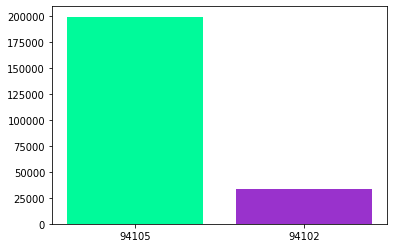

In [30]:
# # Make a more specific bar chart showing polarized comparisons 
# height = [199364, 33552]
# bars = ('94105', '94102')
# y_pos = np.arange(len(bars))

# plt.bar(y_pos, height, color=['mediumspringgreen', 'darkorchid'])
# plt.xticks(y_pos, bars)
# plt.show()



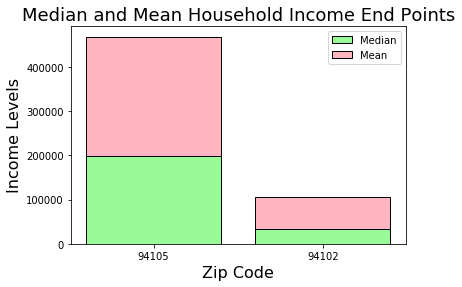

In [49]:

zipcode=['94105','94102']
Calculations=['Median','Mean']
pos = np.arange(len(zipcode))
Index_Median=[199364, 33552]
Index_Mean=[269416, 71287]
 
    
plt.bar(pos,Index_Median,color='palegreen',edgecolor='black')
plt.bar(pos,Index_Mean,color='lightpink',edgecolor='black',bottom=Index_Median)
plt.xticks(pos, zipcode)
plt.xlabel('Zip Code', fontsize=16)
plt.ylabel('Income Levels', fontsize=16)
plt.title('Median and Mean Household Income End Points',fontsize=18)
plt.legend(Calculations,loc=1)
plt.show()